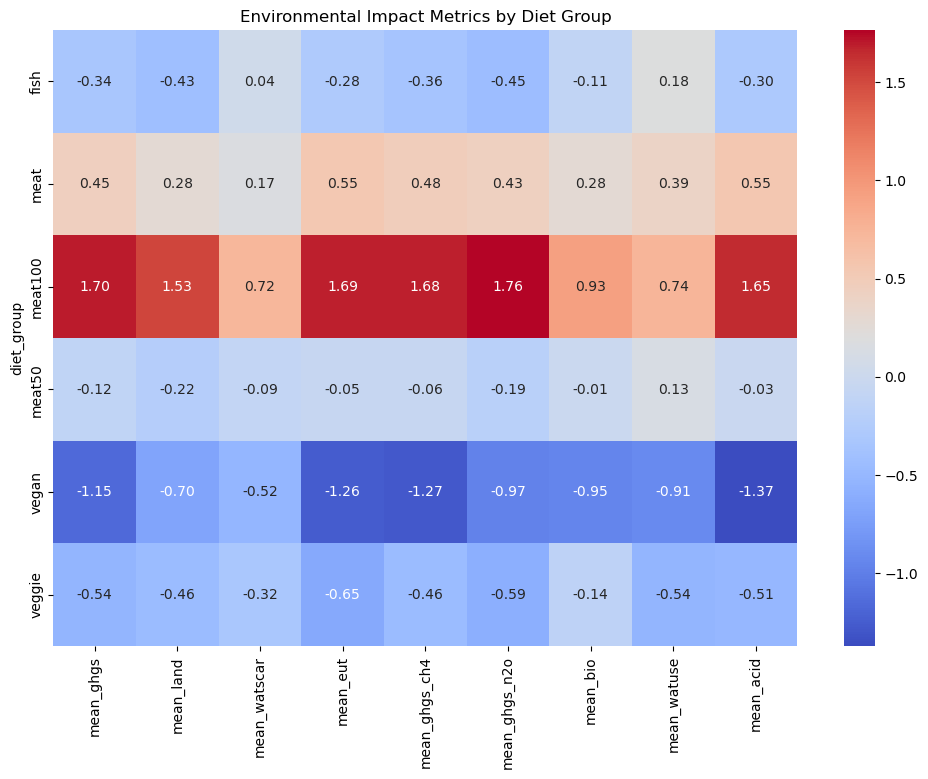

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# read the dataset
data = pd.read_csv('Results_21Mar2022.csv')

# select features related to the environment
metrics = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid']

# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[metrics])

# convert standardized data into DataFrame
scaled_data = pd.DataFrame(data_scaled, columns=metrics)

# add the diet group into the new DataFrame
scaled_data['diet_group'] = data['diet_group']

# group the scaled_data according to 'die_group', calculate the mean, and create a new index
group_data = scaled_data.groupby('diet_group').mean().reset_index()

# generate heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(group_data.set_index('diet_group'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Environmental Impact Metrics by Diet Group')
plt.show()